# Visualizing Networks

In [10]:
%matplotlib notebook

import networkx as nx
import matplotlib.pyplot as plt

# read in the graph 
G = nx.read_gpickle('major_us_cities')

[('El Paso, TX', {'location': (-106, 31), 'population': 674433}),
 ('Long Beach, CA', {'location': (-118, 33), 'population': 469428}),
 ('Dallas, TX', {'location': (-96, 32), 'population': 1257676}),
 ('Oakland, CA', {'location': (-122, 37), 'population': 406253}),
 ('Albuquerque, NM', {'location': (-106, 35), 'population': 556495}),
 ('Baltimore, MD', {'location': (-76, 39), 'population': 622104}),
 ('Raleigh, NC', {'location': (-78, 35), 'population': 431746}),
 ('Mesa, AZ', {'location': (-111, 33), 'population': 457587}),
 ('Arlington, TX', {'location': (-97, 32), 'population': 379577}),
 ('Sacramento, CA', {'location': (-121, 38), 'population': 479686}),
 ('Wichita, KS', {'location': (-97, 37), 'population': 386552}),
 ('Tucson, AZ', {'location': (-110, 32), 'population': 526116}),
 ('Cleveland, OH', {'location': (-81, 41), 'population': 390113}),
 ('Louisville/Jefferson County, KY',
  {'location': (-85, 38), 'population': 609893}),
 ('San Jose, CA', {'location': (-121, 37), 'popul

<IPython.core.display.Javascript object>


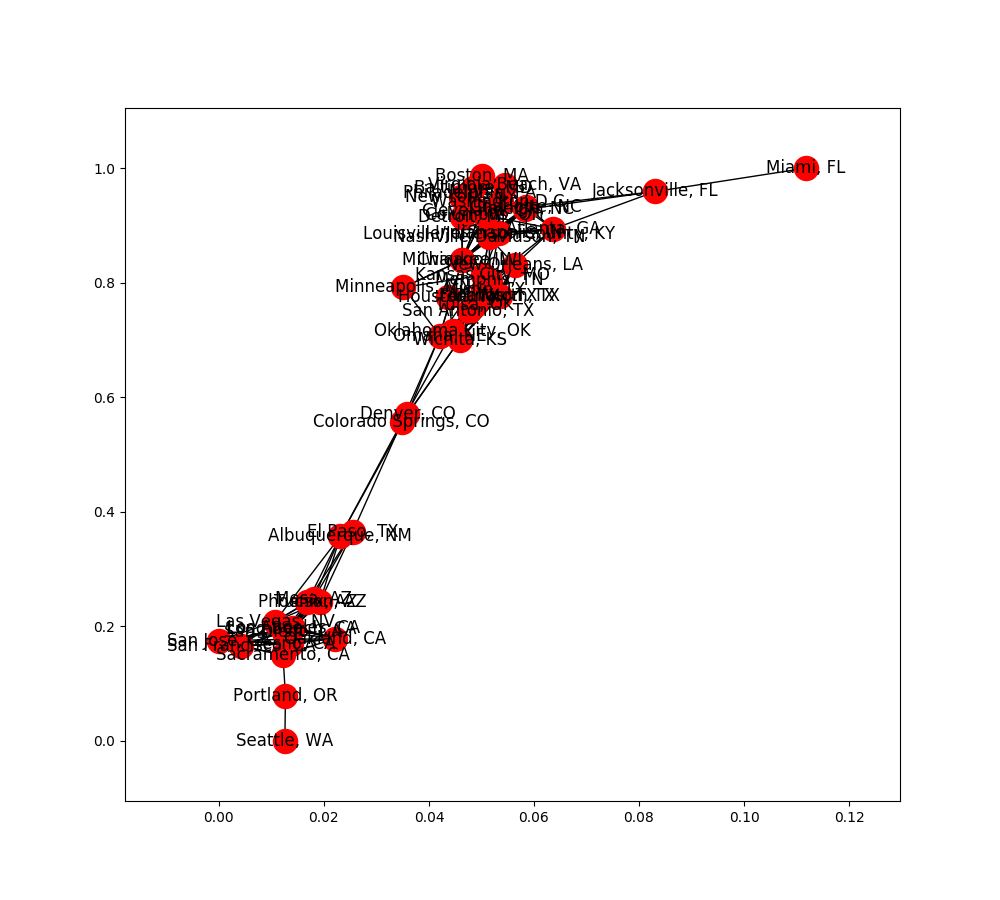

In [2]:
# draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw_networkx(G)

In [3]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['circular_layout',
 'random_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'fruchterman_reingold_layout']

<IPython.core.display.Javascript object>


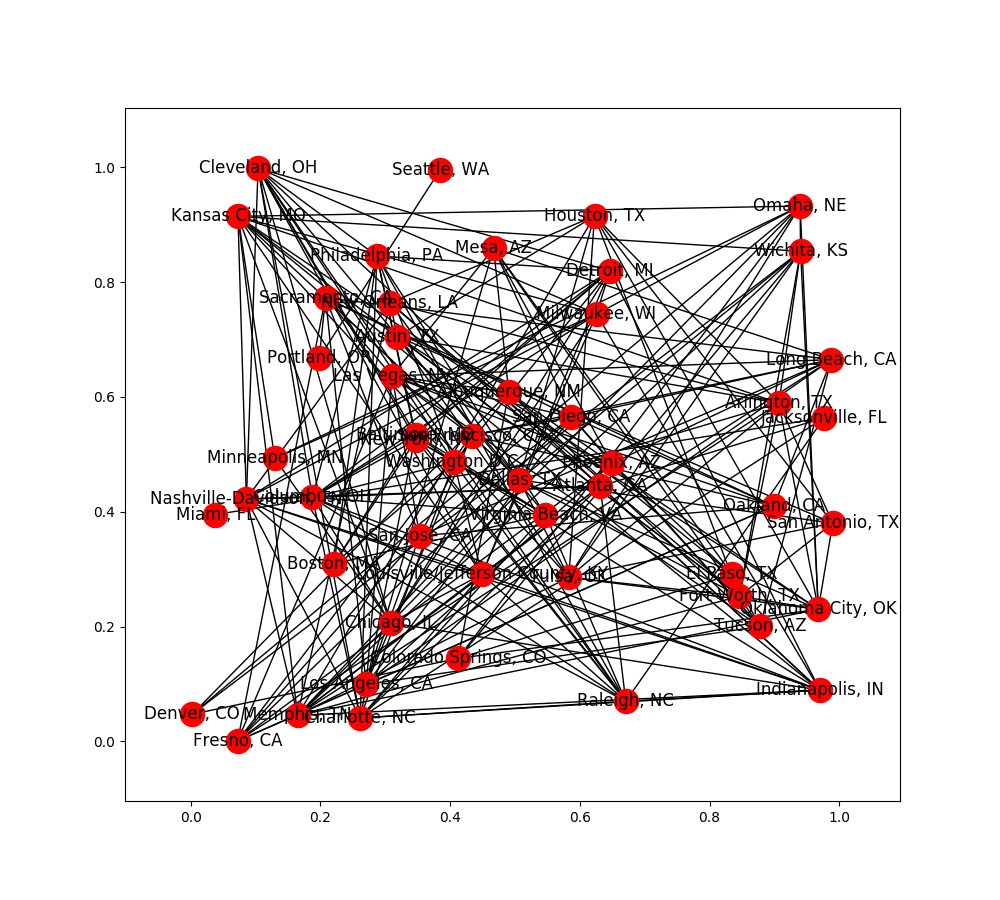

In [4]:
# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G, pos)

<IPython.core.display.Javascript object>


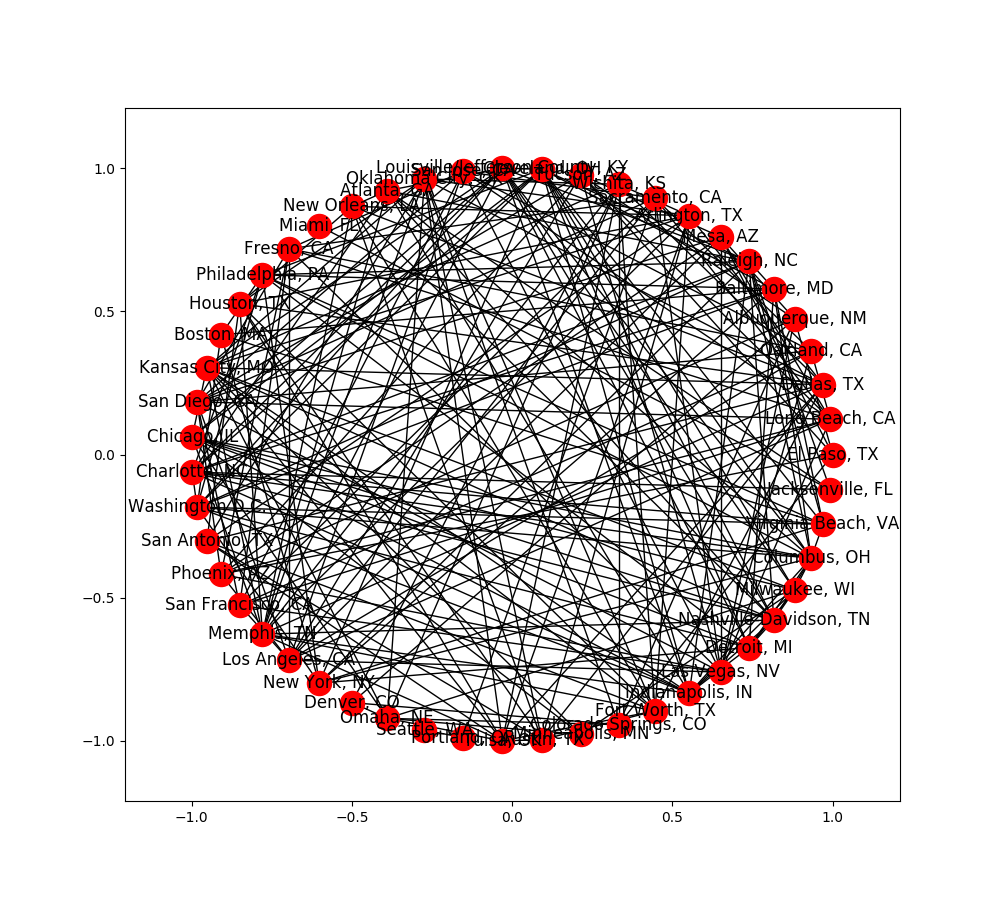

In [5]:
# Draw the graph using the circular layout
plt.figure(figsize=(10,9))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

<IPython.core.display.Javascript object>


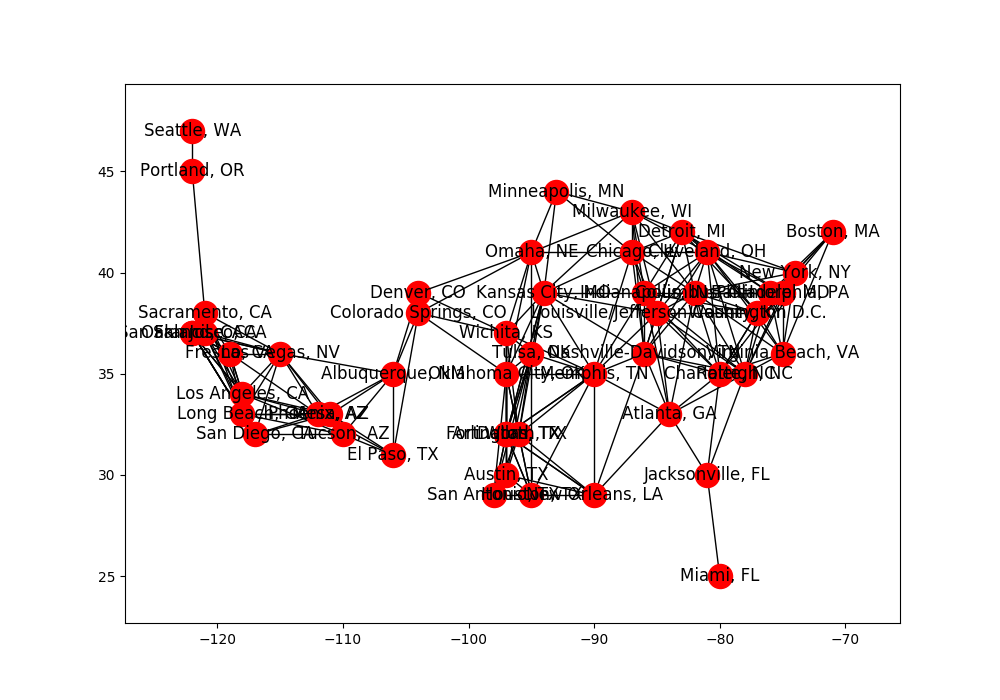

In [6]:
# Draw the graph using custom node positions
plt.figure(figsize=(10,7))

pos = nx.get_node_attributes(G, 'location')
nx.draw_networkx(G, pos)

<IPython.core.display.Javascript object>


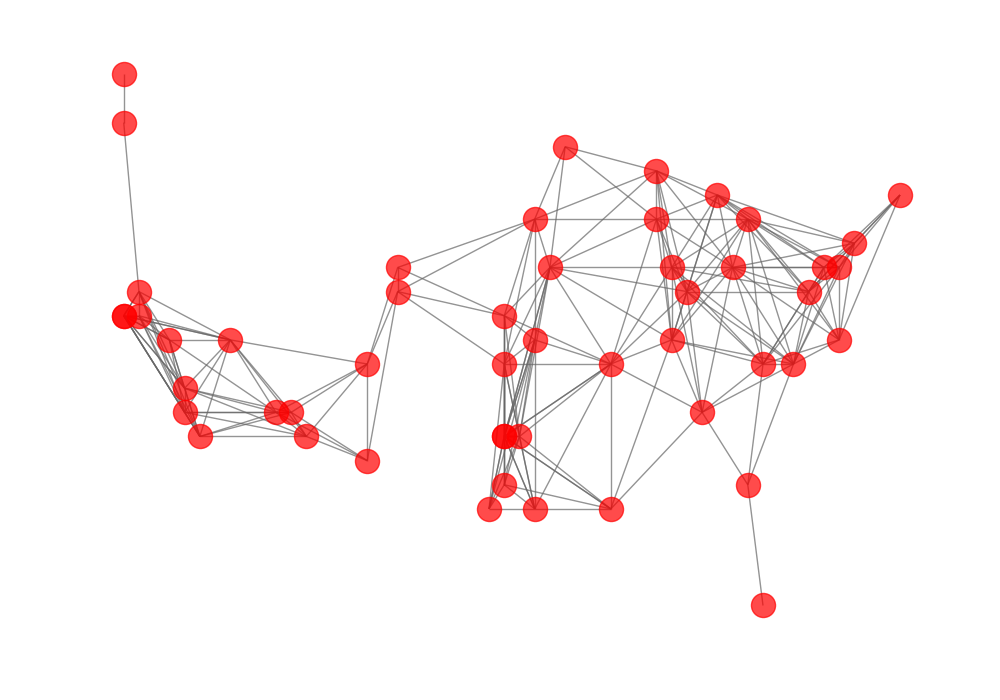

In [7]:
# Draw the graph adding alpha, removing labels, and softening edge color
plt.figure(figsize=(10,7))

nx.draw_networkx(G, pos, alpha=0.7, with_labels=False, edge_color='.4')

plt.axis('off')
plt.tight_layout();

<IPython.core.display.Javascript object>


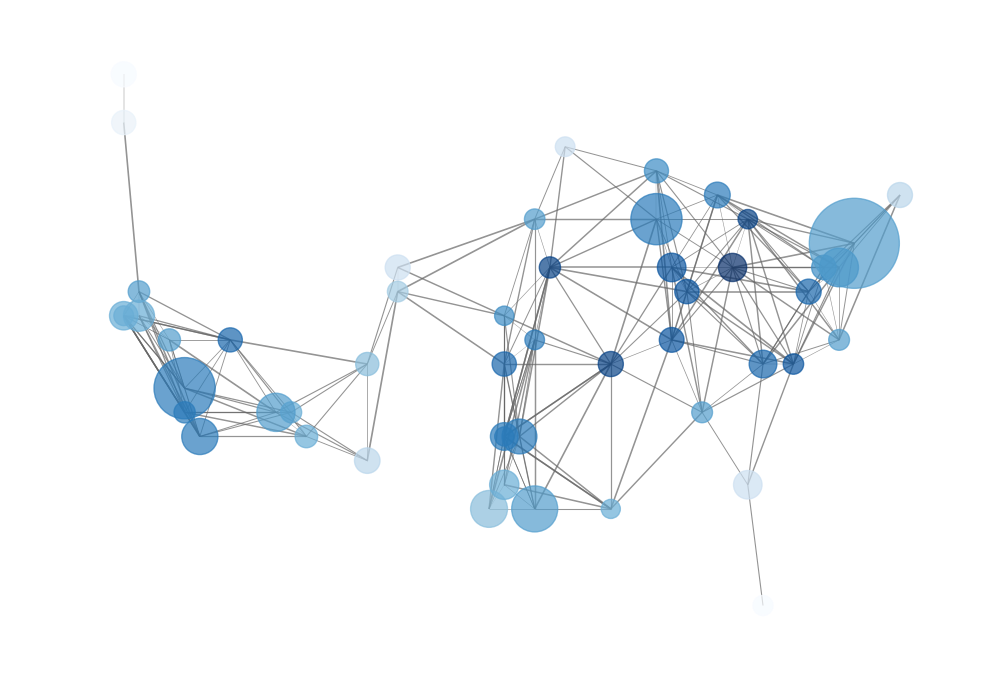

In [8]:
# Draw graph with varying node color, node size, and edge width
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

<IPython.core.display.Javascript object>


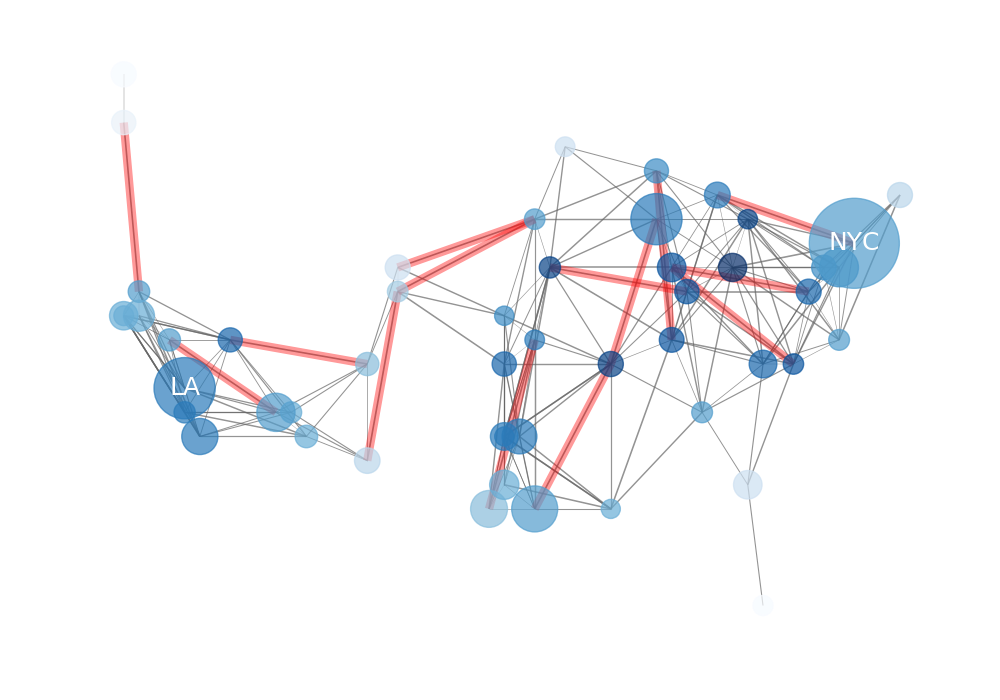

In [9]:
# Draw specific edges and add labels to specific nodes
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)


greater_than_770 = [x for x in G.edges(data=True) if x[2]['weight']>770]
nx.draw_networkx_edges(G, pos, edgelist=greater_than_770, edge_color='r', alpha=0.4, width=6)

nx.draw_networkx_labels(G, pos, labels={'Los Angeles, CA': 'LA', 'New York, NY': 'NYC'}, font_size=18, font_color='w')

plt.axis('off')
plt.tight_layout();

In [12]:
from pyvis.network import Network
g = Network(height=800, widht=800, notebook=True)
g.toggle_hide_edges_on_drag(True)
g.barnes_hut()
g.from_nx(nx.davis_southern_women_graph())
g.show("ex.html")

ModuleNotFoundError: No module named 'pyvis'